<a href="https://colab.research.google.com/github/nikhitavankayalapati/Aritificial-Intelligence-internship/blob/main/ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('/content/drive/MyDrive/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


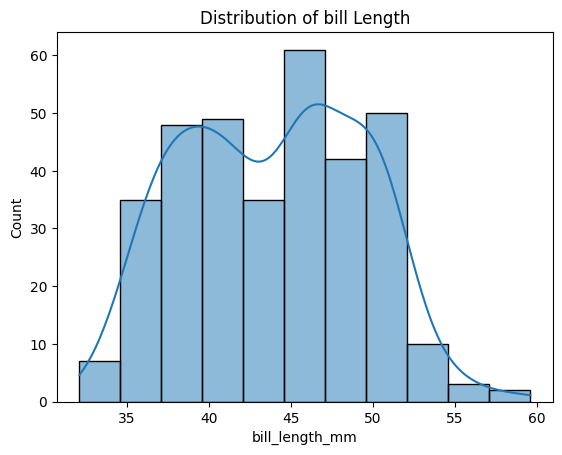

In [4]:
# Univariate Analysis
sns.histplot(df['bill_length_mm'], kde=True)
plt.title('Distribution of bill Length')
plt.show()

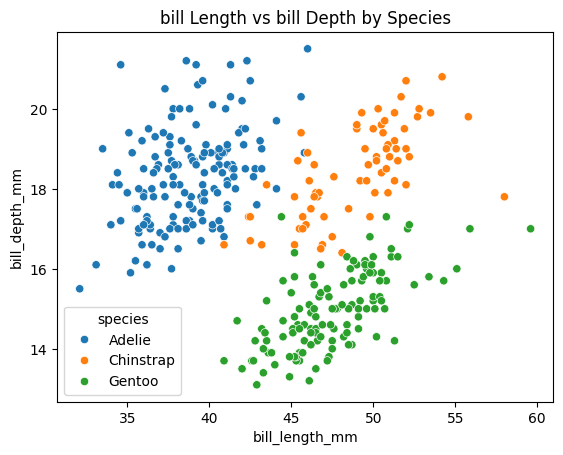

In [5]:
# Bi-Variate Analysis
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title('bill Length vs bill Depth by Species')
plt.show()

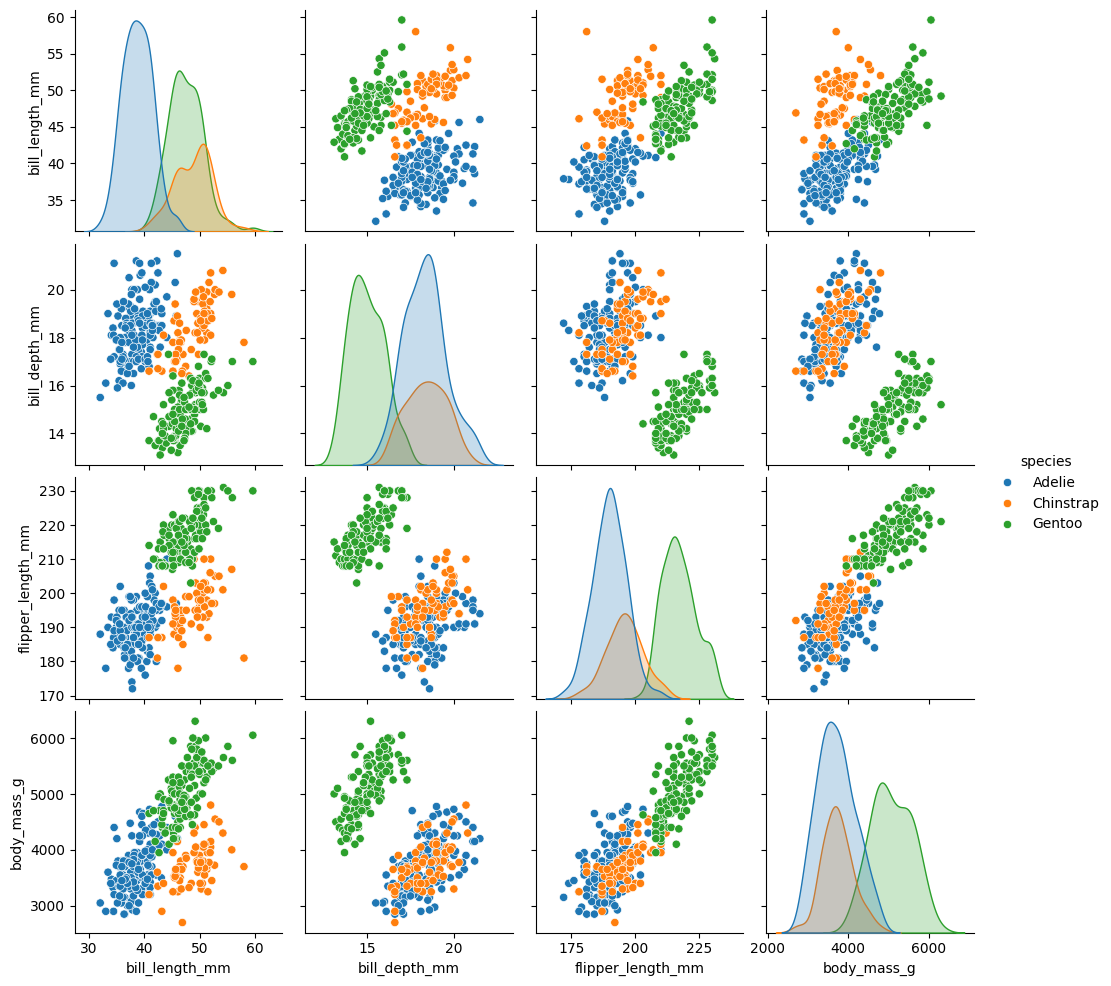

In [6]:
# Multi-Variate Analysis
sns.pairplot(df, hue='species')
plt.show()

In [7]:
#Check Descriptive Statistics
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [12]:
df['species'] = LabelEncoder().fit_transform(df['species'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,MALE
1,0,2,39.5,17.4,186.0,3800.0,FEMALE
2,0,2,40.3,18.0,195.0,3250.0,FEMALE
3,0,2,NaN,NaN,NaN,NaN,NaN
4,0,2,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,2,0,NaN,NaN,NaN,NaN,NaN
340,2,0,46.8,14.3,215.0,4850.0,FEMALE
341,2,0,50.4,15.7,222.0,5750.0,MALE
342,2,0,45.2,14.8,212.0,5200.0,FEMALE


In [11]:
df['island'] = LabelEncoder().fit_transform(df['island'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,MALE
1,0,2,39.5,17.4,186.0,3800.0,FEMALE
2,0,2,40.3,18.0,195.0,3250.0,FEMALE
3,0,2,NaN,NaN,NaN,NaN,NaN
4,0,2,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,2,0,NaN,NaN,NaN,NaN,NaN
340,2,0,46.8,14.3,215.0,4850.0,FEMALE
341,2,0,50.4,15.7,222.0,5750.0,MALE
342,2,0,45.2,14.8,212.0,5200.0,FEMALE


In [14]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,NaN,NaN,NaN,NaN,2
4,0,2,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...
339,2,0,NaN,NaN,NaN,NaN,2
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


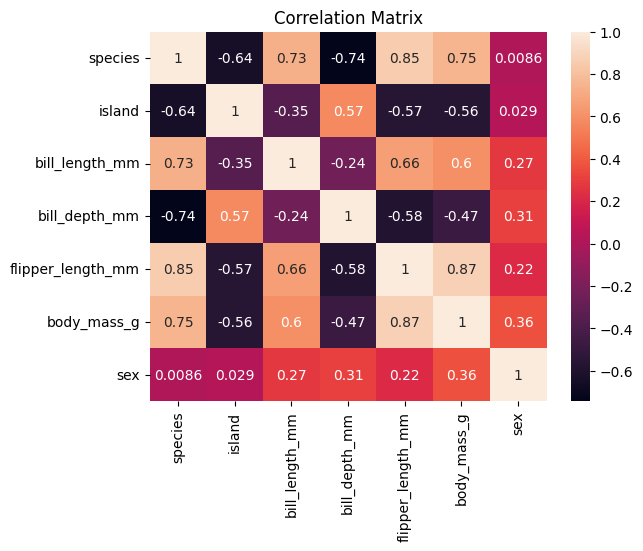

In [15]:
#Check Correlation of the Data
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Filling missing values (if any) - this is an example approach, it may need to be adjusted based on the data
df = df.fillna(df.mean())

In [18]:
# Find the Outliers and Replace Them
# Using IQR method to find outliers
Q1 = df.	flipper_length_mm.quantile(0.25)
Q3 = df.	flipper_length_mm.quantile(0.75)
IQR = Q3 - Q1
IQR

23.0

In [19]:
# Define a function to replace outliers with median
def replace_outliers(data, column):
  median = data[column].median()
  upper_limit = Q3[column] + 1.5 * IQR[column]
  lower_limit = Q1[column] - 1.5 * IQR[column]
  # Identify outliers
  outliers = [x for x in df if x < lower_bound or x > upper_bound]
  # Replace outliers (you can choose how to handle them)
  for outlier in outliers:
    df[df.index(outlier)] = np.median(df)  # Replace with median (or other value)

print("Original data:", df)
print("Outliers:", replace_outliers)
print("Data after handling outliers:", df)

Original data:      species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2        39.10000       18.70000         181.000000   
1          0       2        39.50000       17.40000         186.000000   
2          0       2        40.30000       18.00000         195.000000   
3          0       2        43.92193       17.15117         200.915205   
4          0       2        36.70000       19.30000         193.000000   
..       ...     ...             ...            ...                ...   
339        2       0        43.92193       17.15117         200.915205   
340        2       0        46.80000       14.30000         215.000000   
341        2       0        50.40000       15.70000         222.000000   
342        2       0        45.20000       14.80000         212.000000   
343        2       0        49.90000       16.10000         213.000000   

     body_mass_g  sex  
0    3750.000000    1  
1    3800.000000    0  
2    3250.000000    0  


In [20]:
#Check for Categorical Columns and Perform Encoding
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4201.754386,2
340,2,0,46.80000,14.30000,215.000000,4850.000000,0
341,2,0,50.40000,15.70000,222.000000,5750.000000,1
342,2,0,45.20000,14.80000,212.000000,5200.000000,0


In [21]:
#Split the Data into Dependent and Independent Variables
X = df.drop(columns=['species'])
y = df['species']
X
y


0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [22]:
#Perform Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84407623, -0.88708123,  0.78774251, -1.42248782, -0.56578921,
         0.80247526],
       [ 1.84407623, -0.81349399,  0.12655633, -1.06535169, -0.50316788,
        -0.99006688],
       [ 1.84407623, -0.66631952,  0.43171918, -0.42250666, -1.19200251,
        -0.99006688],
       ...,
       [-0.91402039,  1.1917582 , -0.73807176,  1.50602843,  1.93906399,
         0.80247526],
       [-0.91402039,  0.23512413, -1.19581604,  0.79175618,  1.25022936,
        -0.99006688],
       [-0.91402039,  1.09977416, -0.53462985,  0.8631834 ,  1.50071468,
         0.80247526]])

In [23]:
#Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
#Perform Machine Learning Model Building
model = RandomForestClassifier()

In [25]:
 #Train the Model
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
#Evaluate Your Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
#Test the Model with Random Observations
# Generating a random sample from the test set to check the model prediction
random_sample = X_test[0].reshape(1, -1)
print('Predicted species:', model.predict(random_sample))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Accuracy: 0.9855072463768116
Confusion Matrix:
 [[32  0  0]
 [ 1 15  0]
 [ 0  0 21]]
Predicted species: [1]


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.921930,17.151170,200.915205,4201.754386,0.552326
std,0.893320,0.726194,5.443643,1.969027,14.020657,799.613058,0.558680
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,2.000000
